## **Tempo Detection for Accompaniment Recordings**
This notebook is designed to test various tempo detection methods on accompaniment recordings and in real-time.

### Approaches For Tempo Detection
1. Window + lowpass filter each frame of the signal to 20-45 Hz (corresponding to common tempo BPMs) and look at the max frequency component. Maybe do this on the onset envelope if it works better. This is the simplest approach but may not be the most effective. 
2. Similar to decoding an on-off keyed message (i.e. 1 if start of a beat, 0 if not start of a beat). This just involves computing the power of the frequency spectrum of each frame ("bit") and comparing with a threshold. This approach is likely combined with other approaches. 
3. Try wavelet transform instead of stft for onset detection (find power of frequency spectrum of each frame and compute spectral flux). What if each basis function was a wavelet + sin wave?

### Additional Ideas
1. Maybe have the user clap a few times before to establiish a tempo to "calibrate" the alogrithm. Not sure how useful this is in detecting the tempo of the recording, but it helps with syncing at the start.
2. Support different modes:
    - Solo mode: recording always follows the musician. For general practice.
    - Orchestral mode: musicians can set accompanist to match a conductor (timings are determined from a video of the conductor). For orchestral musician practice.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
import os

In [18]:
#  choose audio file
filename = 'metronome_108.mp3'

In [19]:
# load audio file
audio_path = f'../audio_in/{filename}'
if not os.path.exists(audio_path):
	raise FileNotFoundError(f"Audio file not found: {audio_path}")

signal, sr = librosa.load(audio_path, sr=None)  
t = np.arange(len(signal))/sr
print(f'Sample rate: {sr}')
print(f'Signal length: {len(signal)}')
print(f'Signal duration: {len(signal)/sr:.3f} s')

Sample rate: 44100
Signal length: 373696
Signal duration: 8.474 s


Text(0, 0.5, 'Amplitude')

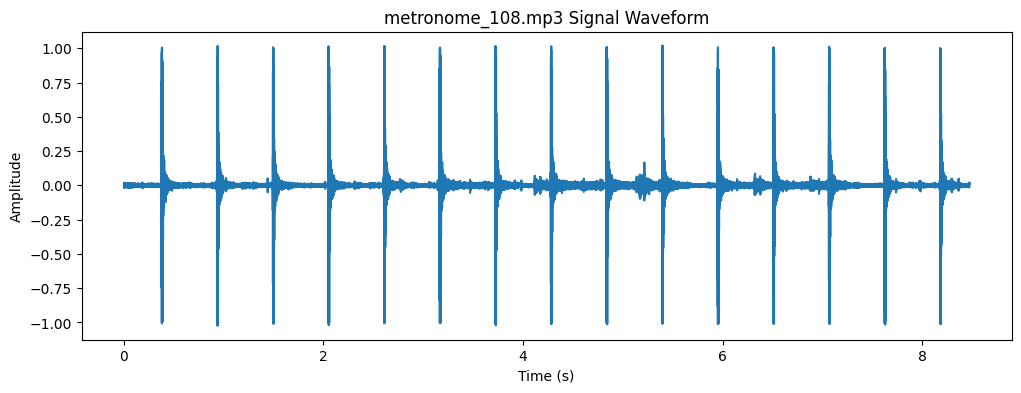

In [20]:
# plot signal waveform
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title(f'{filename} Signal Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')